**Contexto**

El análisis del riesgo financiero es la evaluación de la probabilidad de que se concrete una amenaza y de su posible impacto. Por eso es crucial su estimación en la gestión de riesgos.

La estimación más fácil para realizar el análisis del riesgo financiero en una empresa es combinar la probabilidad de que un riesgo ocurra y las posibles pérdidas económicas que se puedan ocasionar.

En el caso del reto propuesto, las pérdidas económicas consisten en el pago que debe de hacer la compañía en caso de un siniestro, sí el monto total de pagos exceden el capital que tiene disponible la compañía esto causará su ruina y provocará que salga del mercado.

Las decisiones que la empresa puede tomar son el capital inicial $u$ y la prima $c$ que pagarán los asegurados, el monto total de pagos es un proceso estocástico $N(t)$, donde cada vez que ocurre un evento se debe de pagar una cantidad $X$ la cual tiene una función de distribución $F$. Esto se conoce como un proceso de renovación con recompensa (aunque aquí sería con costo).

**Objetivo**

Determinar el efecto de los reclamos de los asegurados, la prima  y el capital inicial de la compañía con su permanencia en el mercado, para ello se estudiarán varios procesos estocásticos (Markoviano, de Poisson, exponencial, etc.) y se elaboraran diversas simulaciones bajo diferentes condiciones.

## **Importamos las librerias**

In [ ]:
#Librerias utilizadas
import pandas as pd # manipulacion de datos
import numpy as np # manipulacion de matrices
from collections import Counter
import math
from math import e
import scipy as sp
from scipy.stats import poisson
from scipy.stats import chi2_contingency
import scipy.stats as st
import matplotlib.pyplot as plt # trazar graficos
from datetime import datetime
import pylab as pl
from statistics import mean
import statistics

In [ ]:
pip install dc_stat_think

In [ ]:
import dc_stat_think as dcst # ecdf estimatio
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

ModuleNotFoundError: ignored

## **Limpieza de la base de datos**

In [ ]:
#Cargamos la base de datos.
df = pd.read_csv('https://raw.githubusercontent.com/Nancy2405/ProbabilidadRuina/main/Datos_aseguradora.csv', encoding='latin-1')
df

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
0,01/12/2020,Deportivo,2017,200000,Si,NaN,Si,Si
1,12/05/2020,Austero,2016,100000,Si,NaN,Si,Si
2,11/01/2020,compacto,2017,150000,Si,NaN,Si,Si
3,21/12/2020,Subcompacto,2017,70000,Si,NaN,Si,Si
4,30/05/2020,Subcompacto,2019,90000,Si,NaN,Si,Si
...,...,...,...,...,...,...,...,...
27116,08/07/2020,Subcompacto,2017,10840,Si,2400.0,No,No
27117,23/12/2020,De Lujo,2016,42280,Si,5600.0,No,No
27118,10/08/2020,Subcompacto,2016,15700,Si,2600.0,No,No
27119,02/10/2020,Austero,2016,8730,Si,1800.0,No,No


In [ ]:
#Se ordena la base de datos por la fecha del siniestro más reciente

df['Fecha del Siniestro']=pd.to_datetime(df['Fecha del Siniestro'])
#df.info()
df = df.sort_values(['Fecha del Siniestro'])
df

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
26539,2020-01-01,Subcompacto,2017,11970,Si,2700.0,No,No
10717,2020-01-01,Subcompacto,2017,17590,Si,2500.0,No,No
26422,2020-01-01,De Lujo,2017,45510,Si,5000.0,No,No
7910,2020-01-01,De Lujo,2017,46570,Si,5600.0,No,No
26444,2020-01-01,Subcompacto,2017,10980,Si,2000.0,No,No
...,...,...,...,...,...,...,...,...
8224,2020-12-30,De Lujo,2018,48060,Si,5500.0,No,No
26785,2020-12-30,Austero,2018,2980,Si,1000.0,No,No
7545,2020-12-30,Subcompacto,2017,13060,Si,2900.0,No,No
19482,2020-12-30,Camioneta,2016,59850,Si,8700.0,No,No


In [ ]:
#Filtramos para trabajar solamente con los reclamos de los que sí se realizó cobertura
df_clean=df[df['Reclamo de Cobertura'] == 'Si']
df_clean

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
8571,2020-01-01,Austero,2018,1240,Si,1800.0,Si,No
17322,2020-01-01,Austero,2017,720,Si,1000.0,Si,No
17123,2020-01-01,Austero,2016,100,Si,1300.0,Si,No
10603,2020-01-01,Austero,2016,540,Si,1900.0,Si,No
12686,2020-01-01,Austero,2017,1010,Si,1100.0,Si,No
...,...,...,...,...,...,...,...,...
15892,2020-12-30,Austero,2016,990,Si,1200.0,Si,No
9675,2020-12-30,Austero,2018,280,Si,1500.0,Si,No
16364,2020-12-30,Austero,2017,1370,Si,2000.0,Si,No
6023,2020-12-30,Austero,2017,710,Si,1200.0,Si,No


## **Cálculo del monto y número de reclamaciones diarias**

In [ ]:
#Diccionario para almacenar los montos de los siniestros por día
monto_diario={}
#Diccionario para almacenar el número de siniestros por día
numero_diario={}

#Se hace uso de un for en donde va por toda la base de datos y va agregando el monto total y
#número de siniestros en un diccionario en donde cada día tiene esto.
for i in df_clean.index:
  if df_clean["Fecha del Siniestro"][i] in monto_diario:
    monto_diario[df_clean["Fecha del Siniestro"][i]] += df_clean["Monto del siniestro"][i]
    numero_diario[df_clean["Fecha del Siniestro"][i]] += 1
  else:
    monto_diario[df_clean["Fecha del Siniestro"][i]] = df_clean["Monto del siniestro"][i]
    numero_diario[df_clean["Fecha del Siniestro"][i]] = 1

lista_montodiario = list(monto_diario.values())
lista_numerodiario = list(numero_diario.values())

In [ ]:
#Cálculo de la media de los montos diarios de los siniestros
media_monto=np.mean(lista_montodiario)
media_monto

8929.269662921348

In [ ]:
#Cálculo de la media de los montos diarios de los siniestros
media_monto=np.mean(lista_montodiario)
#Cálculo de la media del número diario de siniestros
media_numero=np.mean(lista_numerodiario)
print(media_numero, media_monto)

3.634831460674157 8929.269662921348


## **Cálculo de intervalos de confianza para $\lambda$ y $\mu$**

$error=Z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{N}}$

$IC=(\bar{X}-error,\bar{X}+error)$

In [ ]:
#Se define una función para poder sacar el intervalo de confianza usando la formula dada anteriormente

def IntervalodeConfianza(datos):
  desv=np.std(datos)
  media=np.mean(datos)
  z1=1.956
  error=z1*(desv/(math.sqrt(len(datos))))
  x1,x2=media - error,media + error
  return x1,x2

In [ ]:
ICmiu = IntervalodeConfianza(lista_montodiario)
print("Intervalo con 95% de confianza para μ ({} , {})".format(ICmiu[0],ICmiu[1]))
ICLambda = IntervalodeConfianza(lista_numerodiario)
print("Intervalo con 95% de confianza para λ ({} , {})".format(ICLambda[0],ICLambda[1]))

Intervalo con 95% de confianza para μ (5858.035136126417 , 12000.50418971628)
Intervalo con 95% de confianza para λ (3.44382536511146 , 3.8258375562368543)


In [ ]:
ICLambda = IntervalodeConfianza(lista_numerodiario)
print("Intervalo con 95% de confianza para λ ({} , {})".format(ICLambda[0],ICLambda[1]))

Intervalo con 95% de confianza para λ (3.44382536511146 , 3.8258375562368543)


## **Graficas de distribución del número de reclamos y del monto de reclamos**

In [ ]:
#Se define función para poder hacer gráfica de la distribución del núm. de reclamos.

def Graficar(valores, nombre):
  plt.hist(x=valores, bins=None, color='#ffa420', rwidth=0.95)
  plt.title('{0}'.format(nombre))
  plt.xlabel('Cantidad')
  plt.ylabel('Frecuencia')
  return plt.show()

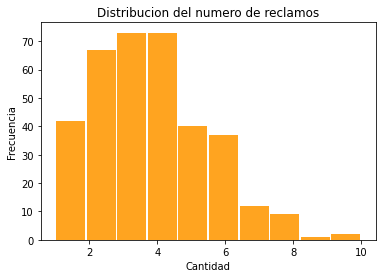

In [ ]:
Graficar(lista_numerodiario, "Distribucion del numero de reclamos")

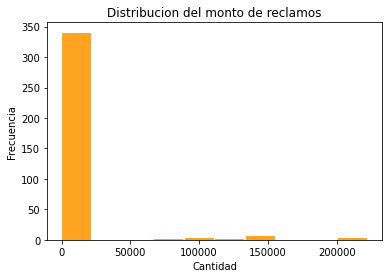

In [ ]:
Graficar(lista_montodiario, "Distribucion del monto de reclamos")

## **Prueba de bondad de ajuste para el número de reclamos**

### Número de reclamos
$H_0:$ El número de reclamos se ajusta a una función de distribución de Poisson 


$H_a:$ No se ajusta a una distribución de Poisson

In [ ]:
count=0
for i in range(len(lista_numerodiario)):
  if(lista_numerodiario[i] == 8):
    count+=1
print(count)

9


In [ ]:
frecuencias_num = Counter(lista_numerodiario)
print(frecuencias_num)

Counter({4: 73, 3: 73, 2: 67, 1: 42, 5: 40, 6: 37, 7: 12, 8: 9, 10: 2, 9: 1})


In [ ]:
frecuencias_num = Counter(lista_numerodiario)
print(frecuencias_num)
ajuste_poisson = pd.DataFrame(columns=['Numero de siniestros', 'Frecuencia real','Probabilidades Poisson','Frecuencia teorica','Estadistico de prueba'])
ajuste_poisson['Numero de siniestros']=frecuencias_num.keys()
ajuste_poisson['Frecuencia real']=frecuencias_num.values()
ajuste_poisson

Counter({4: 73, 3: 73, 2: 67, 1: 42, 5: 40, 6: 37, 7: 12, 8: 9, 10: 2, 9: 1})


,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,6,37,NaN,NaN,NaN
1,4,73,NaN,NaN,NaN
2,7,12,NaN,NaN,NaN
3,3,73,NaN,NaN,NaN
4,8,9,NaN,NaN,NaN
5,2,67,NaN,NaN,NaN
6,1,42,NaN,NaN,NaN
7,10,2,NaN,NaN,NaN
8,5,40,NaN,NaN,NaN
9,9,1,NaN,NaN,NaN


Distribución de Poisson

$P(x|\lambda)=\frac{e^{-\lambda}(\lambda)^{x}}{x!}$

Estadístico de prueba: Chi-cuadrada

$x^{2}_{k-p-1}=\Sigma \frac{(f_{0}-f_{t})^2}{f_t}$

In [ ]:
len(monto_diario)

356

In [ ]:
for i in range(len(ajuste_poisson)):
  ajuste_poisson['Probabilidades Poisson'][i]=((e**(-media_numero))*(media_numero**ajuste_poisson['Numero de siniestros'][i]))/math.factorial(ajuste_poisson['Numero de siniestros'][i])
  ajuste_poisson['Frecuencia teorica'][i]=len(lista_montodiario)*ajuste_poisson['Probabilidades Poisson'][i]
  ajuste_poisson['Estadistico de prueba'][i]=(ajuste_poisson['Frecuencia real'][i]-ajuste_poisson['Frecuencia teorica'][i])**2/(ajuste_poisson['Frecuencia teorica'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
ajuste_poisson

,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,6,37,0.0845251,30.091,1.58636
1,4,73,0.191928,68.3264,0.319677
2,7,12,0.0438907,15.6251,0.841032
3,3,73,0.21121,75.1907,0.0638287
4,8,9,0.0199419,7.09932,0.508866
5,2,67,0.174322,62.0585,0.393473
6,1,42,0.0959173,34.1466,1.80623
7,10,2,0.00292747,1.04218,0.88029
8,5,40,0.139525,49.671,1.88295
9,9,1,0.00805394,2.8672,1.21597


In [ ]:
# Las clases con frecuencia esperada menor a 5 las sumamos a una clase adyacente
def comprobar_f_teorica(ajuste_poisson2):

  ajuste_poisson = np.asarray(ajuste_poisson2)
  
  for i in ajuste_poisson2.index:
    if ajuste_poisson2['Frecuencia teorica'][i] < 5:
      if i == 0:
        ajuste_poisson[i+1] =ajuste_poisson[i] + ajuste_poisson[i+1]
        ajuste_poisson=np.delete(ajuste_poisson,i, axis=0)
        ajuste_poisson = pd.DataFrame(ajuste_poisson, columns=['Numero de siniestros', 'Frecuencia real','Probabilidades Poisson','Frecuencia teorica','Estadistico de prueba'])
        n = len(ajuste_poisson)
        return ajuste_poisson, True, n
      else:
        ajuste_poisson[i-1] =ajuste_poisson[i] + ajuste_poisson[i-1]
        ajuste_poisson=np.delete(ajuste_poisson,i, axis=0)
        ajuste_poisson = pd.DataFrame(ajuste_poisson, columns=['Numero de siniestros', 'Frecuencia real','Probabilidades Poisson','Frecuencia teorica','Estadistico de prueba'])
        n = len(ajuste_poisson)
        return ajuste_poisson, True, n
    

bool = True
n = len(ajuste_poisson.index)
while bool:
  for i in range(n):
    #print('Entre al for')
    if ajuste_poisson['Frecuencia teorica'][i] < 5:
      #print('Entre al if')
      ajuste_poisson, bool, n =comprobar_f_teorica(ajuste_poisson)
      break
      #print(ajuste_poisson)
    else:
      #print('Entre al else')
      bool = False

ajuste_poisson

,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,6,37,0.0845251,30.091,1.58636
1,4,73,0.191928,68.3264,0.319677
2,7,12,0.0438907,15.6251,0.841032
3,3,73,0.21121,75.1907,0.0638287
4,8,9,0.0199419,7.09932,0.508866
5,2,67,0.174322,62.0585,0.393473
6,11,44,0.0988448,35.1887,2.68652
7,14,41,0.147579,52.5382,3.09893


In [ ]:
#Comprobamos que no haya frecuencia teorica menor a 5
ajuste_poisson[ajuste_poisson['Frecuencia teorica']<5]

,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
7,10,2,0.00292747,1.04218,0.88029
9,9,1,0.00805394,2.8672,1.21597


In [ ]:
sumaColumnas=ajuste_poisson.apply(np.sum)
print('Estadistico de prueba: ', sumaColumnas['Estadistico de prueba'])

Estadistico de prueba:  9.498677547588247


Calculamos el valor critico de referencia con:

$$ X^2_{\alpha,k-t-1} $$

In [ ]:
#nivel de significancia
alpha = 0.05
#numero de categorias
k = len(ajuste_poisson)
# parametros que se calularon (lamda)
t = 1
print('alpha: ', alpha, ' grados de libertad: ', k-t-1)

alpha:  0.05  grados de libertad:  8


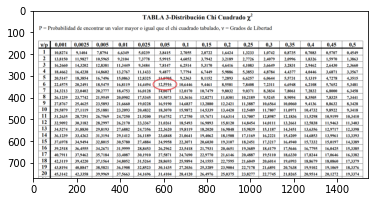

In [ ]:
#Tabla de chi cuadrado
import cv2
img = cv2.imread("image1.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

Usando la tabla de chi cuadrado encontramos que el valor critico de referencia dados el nivel de significancia y los grados de libertad es: **12,5916**, como el estadistico de prueba **9,4987** es menor, no rechazamos $H_0$ y aceptamos la hipotesis nula, por lo tanto, el número de reclamos sigue una distribución Poisson.

In [ ]:
ajuste_poisson

,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,6,37,0.0845251,30.091,1.58636
1,4,73,0.191928,68.3264,0.319677
2,7,12,0.0438907,15.6251,0.841032
3,3,73,0.21121,75.1907,0.0638287
4,8,9,0.0199419,7.09932,0.508866
5,2,67,0.174322,62.0585,0.393473
6,1,42,0.0959173,34.1466,1.80623
7,10,2,0.00292747,1.04218,0.88029
8,5,40,0.139525,49.671,1.88295
9,9,1,0.00805394,2.8672,1.21597


In [ ]:
listaPoisson=[]

for i in range(len(ajuste_poisson)):
  frecuencia_teorica = ajuste_poisson['Frecuencia teorica'][i]
  n_siniestros = ajuste_poisson['Numero de siniestros'][i]
  for x in range(int(frecuencia_teorica)):
    listaPoisson.append(n_siniestros)

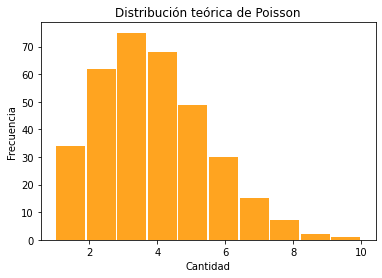

In [ ]:
Graficar(listaPoisson, "Distribución teórica de Poisson")

## **Gráfica de comparación entre la distribución real y la distribución Poisson teórica**

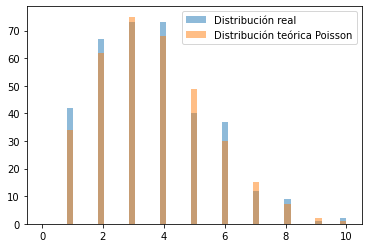

In [ ]:
bins = np.linspace(0, 10, 50)
plt.hist(lista_numerodiario, bins, alpha = 0.5, label='Distribución real')
plt.hist(listaPoisson, bins, alpha = 0.5, label='Distribución teórica Poisson')
plt.legend(loc='upper right')

## **Prueba de bondad de ajuste para el monto de reclamos**

### Monto de los reclamos

$H_0:$ El monto de los reclamos se ajusta a una funcion de distribucion de exponencial 

$H_a:$ El monto de los reclamos no se ajusta a una distribucion exponencial

In [ ]:
import scipy.stats as ss

In [ ]:
media, desviacion = ss.norm.fit(lista_montodiario)
media, desviacion

(8929.269662921348, 29625.734742233308)

Distribución Exponencial

$P(x|\lambda)={\lambda e^{-\lambda{x}}}$

Estadístico de prueba: Kolmogorov-Smirnov

$KS= MAX |(F_{Xi}- \hat F_{Xi})|$

Se hace un ajuste de los datos con la prueba de Kolmogorov-Smirnov, cuya implementación ya viene dentro de la libreria de scipy. El criterio para rechazar la hipotesis nula será a través del p-value. Se establece un alfa de 0.01 que permitirá decir con un nivel de confianza del 99% si el resultado fue estadisticamente significativo. 


In [ ]:
d, pvalor = ss.kstest(lista_montodiario, "expon",args=(media,desviacion))
# buscando un nivel de confianza al 99%
if pvalor > 0.01:
    print("No se ajusta a una exponencial")
else:
    print("Se puede ajustar a una exponencial")

Se puede ajustar a una exponencial


Como el valor del p-value fue menor al alfa establecido aceptamos la hipotesis nula. Queda pendiente observar si se puede ajustar la distribución graficamente para visualizar el comportamiento de estos datos.

A continuacion veo el tema de la funcion de distribucion acumulada con el numero de reclamos y los valores poisson XD

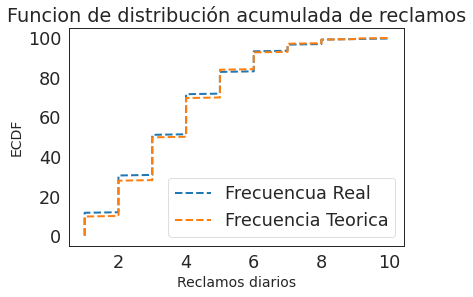

In [ ]:
# Generate x and y values for ECDF: x, y
x_real, y_real = dcst.ecdf(lista_numerodiario)
x_poisson, y_poisson = dcst.ecdf(listaPoisson)
# Plot the ECDF as dots
_ = plt.plot(x_real, y_real*100, linestyle='--', lw = 2)
_ = plt.plot(x_poisson, y_poisson*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.title('Funcion de distribución acumulada de reclamos')
_ = plt.legend(("Frecuencua Real", "Frecuencia Teorica"))
_ = plt.xlabel('Reclamos diarios', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [ ]:
# Ajuste de las funciones ecdf con cada muestra
# ==============================================================================
ecdf_real = ECDF(lista_numerodiario)
ecdf_poisson = ECDF(listaPoisson)

In [ ]:
lista = lista_numerodiario + listaPoisson
lista = pd.DataFrame(lista)
grid_salario = np.sort(lista[0].unique())
prob_acumulada_ecdf_1989 = ecdf_real(grid_salario)
prob_acumulada_ecdf_1990 = ecdf_poisson(grid_salario)

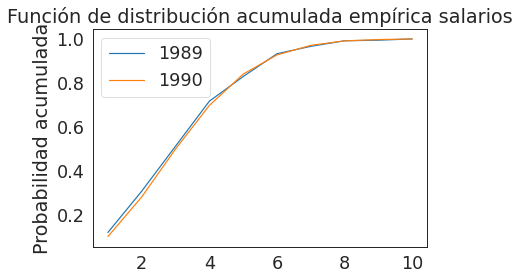

In [ ]:
# Representación gráfica de las curvas ecdf
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid_salario, prob_acumulada_ecdf_1989, label='1989')
ax.plot(grid_salario, prob_acumulada_ecdf_1990, label='1990')
ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend();

In [ ]:
# Distancia Kolmogorov–Smirnov
# ==============================================================================
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.0263


In [ ]:
# Test Kolmogorov–Smirnov entre dos muestras
# ==============================================================================
ks_2samp(
    lista_numerodiario, listaPoisson
)

Ks_2sampResult(statistic=0.026296393356700625, pvalue=0.9993751398818267)

In [ ]:
pip install fitter

     |████████████████████████████████| 47 kB 3.4 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=9750d989f6a49b665681cdbcc40ef8a64edbcb78b797c16fd4b39562a18ab8f8
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=003d7b55a0061040329e626d94b538b964f52d328a116afe84c486a985b44b7b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

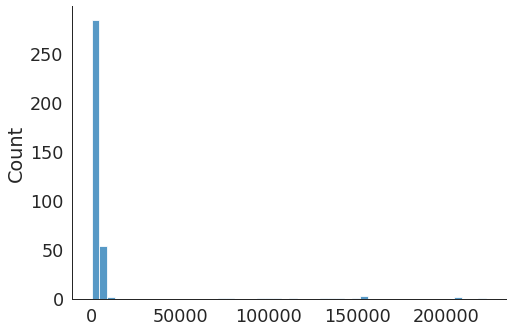

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot( x= lista_montodiario, kind="hist", bins = 50, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
expon,1.027197e-08,2172.324323,-8627.934926,inf


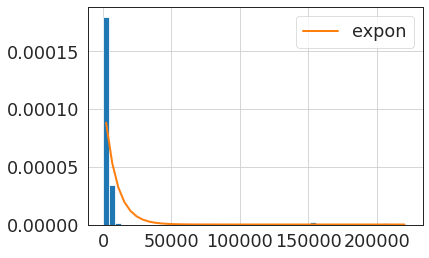

In [ ]:
f = Fitter(lista_montodiario,
           distributions=['expon'], bins=50, xmax=10000000)
f.fit()
f.summary()

In [ ]:
Z_0 = 0

In [ ]:
for i in range(10):
  print(np.random.poisson(media_numero))

5
5
4
2
2
4
7
5
3
2


## **Simulación de 10,000 trayectorias MC**

$X(t)= u + ct - 
\sum_{k=1}^{N(t)}Z_{k}
$

$\varphi(u)= P(X(t)<0, para \ algun \ t>0 \mid X(0)=u)$

$\varphi(u)= P(X(t)<0, para \ algun \ t>0 \mid X(0)=u)$




In [ ]:
sp.stats.expon(media_monto).rvs()
print(media_numero)

3.634831460674157


In [ ]:
(math.exp(1))

2.718281828459045

1


OverflowError: ignored

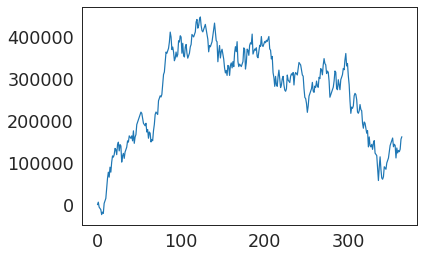

In [ ]:
num_tray = 0
sumatoria = 0
cont = 0 #cuenta cuantas veces al año tuvo un valor menor a cero en capital
prob_ruina = []
prob = 0
c_inicial = 0
prima  = media_monto*media_numero+300

#definimos el numero de años
for i in range(1,11):
  print(i)
  xt = [c_inicial]
  #inicializamos el anio
  sum=0
  prim=0
  for j in range(364):
    sumatoria = 0
    #definimos el numero de reclamos aleatoriamente siguiendo una distribucion poisson
    num_tray = np.random.poisson(media_numero)
    #suma los montos del numero de reclamo aleatorio con distribucion exponencial
    for num in range(num_tray):
      sumatoria += sp.stats.expon(media_monto).rvs()
    #calculamos el valor del capital al sumarle la prima y quitarle los montos
    xt.append(xt[j]+prima-sumatoria)
  #ploteamos el primer anio de reclamos 
  plt.plot(xt)

  for valor in xt:
    if valor < 0:
      cont += 1
      break
  #probabilidad de ruina por cada anio acumulado:  veces_xt < 0 / num de años
  prob = ((media_numero)/prima*media_monto)*(math.exp(-c_inicial*(media_monto*(media_numero/prima))))
  prob_ruina.append(prob)

plt.show()

psi_analitica = ((media_numero*media_monto)/prima)*(math.exp(-c_inicial*(media_monto*(media_numero/prima))))
y = [psi_analitica, psi_analitica]
x = [1,10000]

plt.plot(prob_ruina)
plt.plot(x,y)

In [ ]:
psi_analitica = ((media_numero*media_monto)/prima)*(math.exp(-c_inicial*(media_monto*(media_numero/prima))))

In [ ]:
psi_analitica

0.9908414816977968

Streaming output truncated to the last 5000 lines.
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190

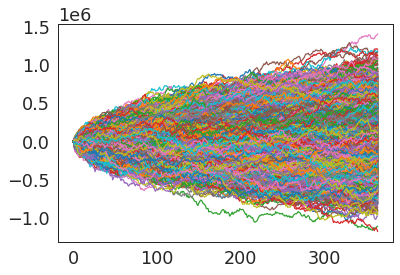

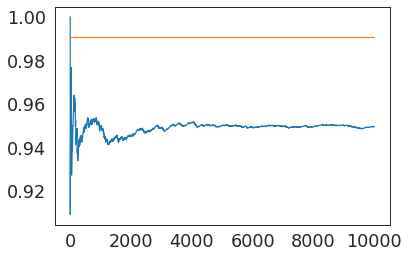

In [ ]:
num_tray = 0
sumatoria = 0
cont = 0 #cuenta cuantas veces al año tuvo un valor menor a cero en capital
prob_ruina = []
prob = 0
prima  = media_monto*media_numero+300

#definimos el numero de años
for i in range(1,10001):
  print(i)
  xt = [c_inicial]
  #inicializamos el anio
  for j in range(364):
    sumatoria = 0
    #definimos el numero de reclamos aleatoriamente siguiendo una distribucion poisson
    num_tray = np.random.poisson(media_numero)
    #suma los montos del numero de reclamo aleatorio con distribucion exponencial
    for num in range(num_tray):
      sumatoria += sp.stats.expon(media_monto).rvs()
    #calculamos el valor del capital al sumarle la prima y quitarle los montos
    xt.append(xt[j]+prima-sumatoria)
  #ploteamos el primer anio de reclamos 
  plt.plot(xt)

  for valor in xt:
    if valor < 0:
      cont += 1
      break
  #probabilidad de ruina por cada anio acumulado:  veces_xt < 0 / num de años
  prob = cont/(i)
  prob_ruina.append(prob)

plt.show()

psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [1,10000]

plt.plot(prob_ruina)
plt.plot(x,y)

In [ ]:
prob_ruina

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333]

365


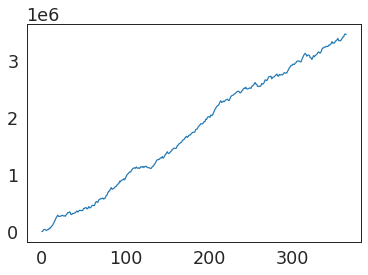

In [ ]:
#Como se comparta el capital en un anio
plt.plot(xt)
print(len(xt))

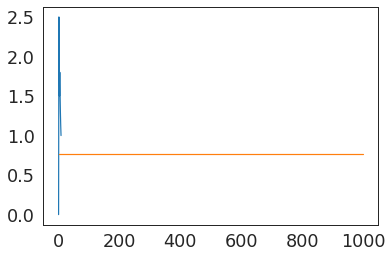

In [ ]:
psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [1,1000]

plt.plot(prob_ruina)
plt.plot(x,y)

In [ ]:
psi_analitica

0.9908414816977968

## **MC con reducción de varianza**



Nivel de confianza = $1-\alpha$

Nivel de significancia = $\alpha$

$P(-z_{\alpha/2} \leq z \leq z_{\alpha/2})= 1 - \alpha$

$-z_{\alpha/2} \leq \frac{\hat{\theta} - \theta }{\sigma_{\hat{\theta}}}\leq z_{\alpha/2}$

$|\hat{\theta} - \theta| = z_{\alpha/2}\cdot \sigma_{\hat{\theta}}$


**Margen de error**

$\epsilon = |\hat{\theta} - \theta| $

$\epsilon = z_{\alpha/2}\cdot \sigma_{\hat{\theta}} $

$\sigma_{\hat{\theta}}= \frac{\epsilon}{z_{\alpha/2}} $

In [ ]:
#Margen de error definido del 10%
epsilon= 0.1

#Cálculo del punto crítico con significancia de 0.05 
alpha=0.05
n_sided = 2 
z_crit = st.norm.ppf(1-alpha/n_sided)

var=round((epsilon/z_crit), 2)

In [ ]:
iteraciones = 500
num_tray = 0
monto_tray = 0
sumatoria = 0
cont = 0
prob_ruina = []
prob = 0
prima  = media_monto*media_numero+100
probabilidades_ruina_red=[]

for i in range(iteraciones):
    xt = [c_inicial]
    for j in range(365):
        sumatoria = 0
        num_tray = np.random.poisson(media_numero)
        for num in range(num_tray):
            sumatoria += sp.stats.expon(media_monto).rvs()
        xt.append(xt[j]+prima-sumatoria)
    for valor in xt:
        if valor <0:
            cont += 1
            break
    prob = cont/(i+1)
    #print(cont, prob)
    probabilidades_ruina_red.append(prob)
    ds=round(statistics.pstdev(probabilidades_ruina_red), 2)
    if ds == var:
        r=i+1
        media_ruina=mean(probabilidades_ruina_red)
        print("Mínima variabilidad")
        print("Simulación ",r," Probabilidad de ruina estimada: ",media_ruina," Con nivel de significancia: ",alpha)
        break


In [ ]:
ds

# Simulación con base sin filtrar

In [ ]:
#Cargamos la base de datos.
df = pd.read_csv('https://raw.githubusercontent.com/Nancy2405/ProbabilidadRuina/main/Datos_aseguradora.csv', encoding='latin-1')
df

,Fecha del Siniestro,Tipo de auto,Modelo,Monto del siniestro,Aplica cobertura,Deducible,Reclamo de Cobertura,Pérdida total
0,01/12/2020,Deportivo,2017,200000,Si,NaN,Si,Si
1,12/05/2020,Austero,2016,100000,Si,NaN,Si,Si
2,11/01/2020,compacto,2017,150000,Si,NaN,Si,Si
3,21/12/2020,Subcompacto,2017,70000,Si,NaN,Si,Si
4,30/05/2020,Subcompacto,2019,90000,Si,NaN,Si,Si
...,...,...,...,...,...,...,...,...
27116,08/07/2020,Subcompacto,2017,10840,Si,2400.0,No,No
27117,23/12/2020,De Lujo,2016,42280,Si,5600.0,No,No
27118,10/08/2020,Subcompacto,2016,15700,Si,2600.0,No,No
27119,02/10/2020,Austero,2016,8730,Si,1800.0,No,No


In [ ]:
#Diccionario para almacenar los montos de los siniestros por día
monto_diario={}
#Diccionario para almacenar el número de siniestros por día
numero_diario={}

#Se hace uso de un for en donde va por toda la base de datos y va agregando el monto total y
#número de siniestros en un diccionario en donde cada día tiene esto.
for i in df.index:
  if df["Fecha del Siniestro"][i] in monto_diario:
    monto_diario[df["Fecha del Siniestro"][i]] += df["Monto del siniestro"][i]
    numero_diario[df["Fecha del Siniestro"][i]] += 1
  else:
    monto_diario[df["Fecha del Siniestro"][i]] = df["Monto del siniestro"][i]
    numero_diario[df["Fecha del Siniestro"][i]] = 1

lista_montodiario = list(monto_diario.values())
lista_numerodiario = list(numero_diario.values())

#Cálculo de la media de los montos diarios de los siniestros
media_monto=np.mean(lista_montodiario)
#Cálculo de la media del número diario de siniestros
media_numero=np.mean(lista_numerodiario)
print(media_numero, media_monto)

74.30410958904109 2286439.671232877


### **Cálculo de intervalos de confianza para $\lambda$ y $\mu$**

$error=Z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{N}}$

$IC=(\bar{X}-error,\bar{X}+error)$

In [ ]:
#Se define una función para poder sacar el intervalo de confianza usando la formula dada anteriormente

def IntervalodeConfianza(datos):
  desv=np.std(datos)
  media=np.mean(datos)
  z1=1.956
  error=z1*(desv/(math.sqrt(len(datos))))
  x1,x2=media - error,media + error
  return x1,x2

In [ ]:
ICmiu = IntervalodeConfianza(lista_montodiario)
print("Intervalo con 95% de confianza para μ ({} , {})".format(ICmiu[0],ICmiu[1]))
ICLambda = IntervalodeConfianza(lista_numerodiario)
print("Intervalo con 95% de confianza para λ ({} , {})".format(ICLambda[0],ICLambda[1]))

Intervalo con 95% de confianza para μ (2245772.6578463963 , 2327106.6846193573)
Intervalo con 95% de confianza para λ (73.44168818166146 , 75.16653099642072)


### **Graficas de distribución del número de reclamos y del monto de reclamos**

In [ ]:
#Se define función para poder hacer gráfica de la distribución del núm. de reclamos.

def Graficar(valores, nombre):
  plt.hist(x=valores, bins=None, color='#ffa420', rwidth=0.95)
  plt.title('{0}'.format(nombre))
  plt.xlabel('Cantidad')
  plt.ylabel('Frecuencia')
  return plt.show()

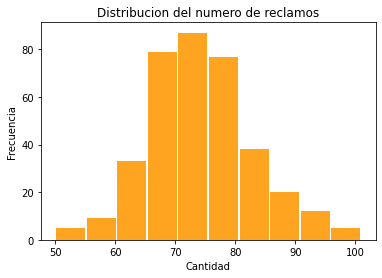

In [ ]:
Graficar(lista_numerodiario, "Distribucion del numero de reclamos")

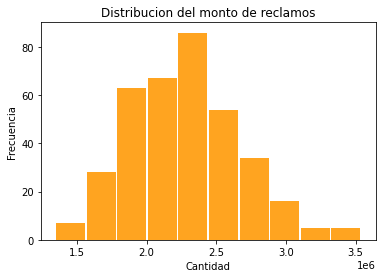

In [ ]:
Graficar(lista_montodiario, "Distribucion del monto de reclamos")

### **Prueba de bondad de ajuste para el número de reclamos**

#### Número de reclamos
$H_0:$ El número de reclamos se ajusta a una función de distribución de Poisson 


$H_a:$ No se ajusta a una distribución de Poisson

In [ ]:
frecuencias_num = Counter(lista_numerodiario)
print(frecuencias_num)
ajuste_poisson = pd.DataFrame(columns=['Numero de siniestros', 'Frecuencia real','Probabilidades Poisson','Frecuencia teorica','Estadistico de prueba'])
ajuste_poisson['Numero de siniestros']=frecuencias_num.keys()
ajuste_poisson['Frecuencia real']=frecuencias_num.values()
ajuste_poisson

Counter({79: 24, 72: 23, 73: 19, 69: 19, 70: 17, 77: 16, 75: 16, 66: 15, 68: 15, 74: 15, 71: 14, 78: 14, 76: 14, 67: 13, 65: 10, 80: 9, 81: 9, 82: 8, 64: 8, 62: 8, 83: 7, 84: 7, 85: 7, 63: 6, 86: 6, 60: 6, 88: 5, 91: 5, 87: 5, 92: 4, 89: 3, 54: 2, 58: 2, 97: 2, 94: 1, 53: 1, 96: 1, 50: 1, 95: 1, 90: 1, 93: 1, 101: 1, 61: 1, 59: 1, 52: 1, 100: 1})


,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,82,8,NaN,NaN,NaN
1,77,16,NaN,NaN,NaN
2,73,19,NaN,NaN,NaN
3,80,9,NaN,NaN,NaN
4,66,15,NaN,NaN,NaN
5,71,14,NaN,NaN,NaN
6,92,4,NaN,NaN,NaN
7,67,13,NaN,NaN,NaN
8,63,6,NaN,NaN,NaN
9,72,23,NaN,NaN,NaN


Distribución de Poisson

$P(x|\lambda)=\frac{e^{-\lambda}(\lambda)^{x}}{x!}$

Estadístico de prueba: Chi-cuadrada

$x^{2}_{k-p-1}=\Sigma \frac{(f_{0}-f_{t})^2}{f_t}$

In [ ]:
for i in range(len(ajuste_poisson)):
  ajuste_poisson['Probabilidades Poisson'][i]=((e**(-media_numero))*(media_numero**ajuste_poisson['Numero de siniestros'][i]))/math.factorial(ajuste_poisson['Numero de siniestros'][i])
  ajuste_poisson['Frecuencia teorica'][i]=len(lista_montodiario)*ajuste_poisson['Probabilidades Poisson'][i]
  ajuste_poisson['Estadistico de prueba'][i]=(ajuste_poisson['Frecuencia real'][i]-ajuste_poisson['Frecuencia teorica'][i])**2/(ajuste_poisson['Frecuencia teorica'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
ajuste_poisson

,Numero de siniestros,Frecuencia real,Probabilidades Poisson,Frecuencia teorica,Estadistico de prueba
0,82,8,0.0299337,10.9258,0.783502
1,77,16,0.043272,15.7943,0.00267907
2,73,19,0.0461056,16.8285,0.280195
3,80,9,0.0360109,13.144,1.3065
4,66,15,0.0302767,11.051,1.41116
5,71,14,0.0438918,16.0205,0.254824
6,92,4,0.00586882,2.14212,1.61136
7,67,13,0.0335773,12.2557,0.045199
8,63,6,0.0202631,7.39605,0.263512
9,72,23,0.0452964,16.5332,2.52945


In [ ]:
sumaColumnas=ajuste_poisson.apply(np.sum)
sumaColumnas

Numero de siniestros      3510.000000
Frecuencia real            365.000000
Probabilidades Poisson       0.980499
Frecuencia teorica         357.882004
Estadistico de prueba       43.710050
dtype: float64

In [ ]:
listaPoisson=[]

for i in range(len(ajuste_poisson)):
  frecuencia_teorica = ajuste_poisson['Frecuencia teorica'][i]
  n_siniestros = ajuste_poisson['Numero de siniestros'][i]
  for x in range(int(frecuencia_teorica)):
    listaPoisson.append(n_siniestros)

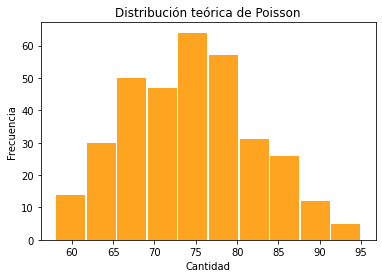

In [ ]:
Graficar(listaPoisson, "Distribución teórica de Poisson")

### **Gráfica de comparación entre la distribución real y la distribución Poisson teórica**

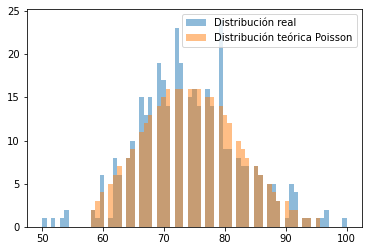

In [ ]:
bins = np.linspace(50, 100, 70)
plt.hist(lista_numerodiario, bins, alpha = 0.5, label='Distribución real')
plt.hist(listaPoisson, bins, alpha = 0.5, label='Distribución teórica Poisson')
plt.legend(loc='upper right')

### **Prueba de bondad de ajuste para el monto de reclamos**

#### Monto de los reclamos

$H_0:$ El monto de los reclamos se ajusta a una funcion de distribucion de exponencial 

$H_a:$ El monto de los reclamos no se ajusta a una distribucion exponencial

In [ ]:
media, desviacion = ss.norm.fit(lista_montodiario)
media, desviacion

(2286439.671232877, 397209.7136183462)

Distribución Exponencial

$P(x|\lambda)={\lambda e^{-\lambda{x}}}$

Estadístico de prueba: Kolmogorov-Smirnov

$KS= MAX |(F_{Xi}- \hat F_{Xi})|$


Se hace un ajuste de los datos con la prueba de Kolmogorov-Smirnov, cuya implementación ya viene dentro de la libreria de scipy. El criterio para rechazar la hipotesis nula será a través del p-value. Se establece un alfa de 0.01 que permitirá decir con un nivel de confianza del 99% si el resultado fue estadisticamente significativo. 



In [ ]:
d, pvalor = ss.kstest(lista_montodiario, "expon",args=(media,desviacion))
# buscando un nivel de confianza al 99%
if pvalor > 0.01:
    print("No se ajusta a una exponencial")
else:
    print("Se puede ajustar a una exponencial")

Se puede ajustar a una exponencial


Como el valor del p-value fue menor al alfa establecido rechazamos la hipotesis nula a favor de la alternativa. Queda pendiente observar si se puede ajustar la distribución graficamente para visualizar el comportamiento de estos datos.

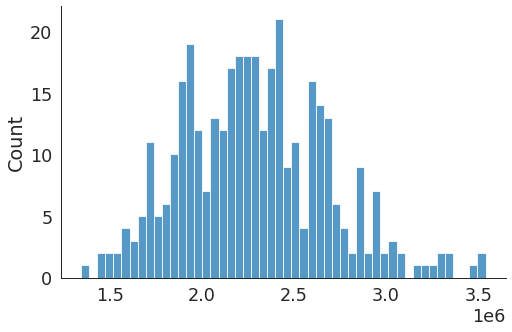

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot( x= lista_montodiario, kind="hist", bins = 50, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
expon,1.079646e-11,1496.083293,-11358.570699,inf


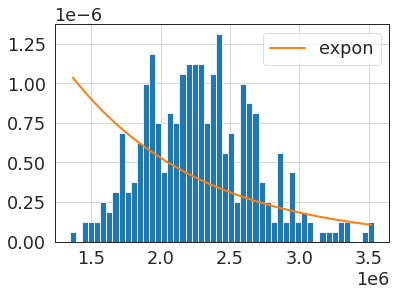

In [ ]:
f = Fitter(lista_montodiario,
           distributions=['expon'], bins=50, xmax=10000000)
f.fit()
f.summary()

In [ ]:
# Ajuste de las funciones ecdf con cada muestra
# ==============================================================================
ecdf_real = ECDF(lista_numerodiario)
ecdf_poisson = ECDF(listaPoisson)

NameError: ignored

In [ ]:
lista = lista_numerodiario + listaPoisson
lista = pd.DataFrame(lista)
grid_salario = np.sort(lista[0].unique())
prob_acumulada_ecdf_1989 = ecdf_real(grid_salario)
prob_acumulada_ecdf_1990 = ecdf_poisson(grid_salario)

NameError: ignored

In [ ]:
# Distancia Kolmogorov–Smirnov
# ==============================================================================
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.0314


In [ ]:
# Test Kolmogorov–Smirnov entre dos muestras
# ==============================================================================
ks_2samp(
    lista_numerodiario, listaPoisson
)

Ks_2sampResult(statistic=0.03136823222439661, pvalue=0.9923711288823674)

### Probabilidad de ruina con MC 

In [ ]:
c_inicial = int(input('Capital Inicial: '))
prima  = media_monto*media_numero+100

Capital Inicial: 0


$X(t)= u + ct - 
\sum_{k=1}^{N(t)}Z_{k}
$

$\varphi(u)= P(X(t)<0, para \ algun \ t>0 \mid X(0)=u)$

In [ ]:
iteraciones = 100
num_tray = 0
monto_tray = 0
sumatoria = 0
cont = 0
prob_ruina = []
prob = 0
#prima  = media_monto*media_numero+100

for i in range(iteraciones):
  xt = [c_inicial]
  for j in range(365):
    sumatoria = 0
    num_tray = np.random.poisson(media_numero)
    for num in range(num_tray):
      sumatoria += sp.stats.expon(media_monto).rvs()
    xt.append(xt[j]+prima-sumatoria)
  plt.plot(xt)

  for valor in xt:
    if valor <0:
      cont += 1
      break
  prob = cont/(i+1)
  prob_ruina.append(prob)

plt.show()

psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [1,iteraciones]

plt.plot(prob_ruina)
plt.plot(x,y)

KeyboardInterrupt: ignored

In [ ]:
psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [1,iteraciones]

plt.plot(prob_ruina)
plt.plot(x,y)

In [ ]:
psi_analitica

###**Metodo recursivo de panjer**

Relación de recursividad de Panjer. \\
$P_k = P(X=k) = (a + b/k)P_{k-1}$ \\
donde: \\
$X = \sum_{i=1}^N Z_i $, donde $Z_1$, $Z_2$,..., son variables aleatorias $i.i.d.$ y $N$ es una variable discreta no negativa que representa el número de reclamos. \\

Cabe mencionar que tenemos un método recursivo clase $(a,b,0)$, por lo que $a=0$ y $b=\lambda$.

In [ ]:
#PROBABILIDAD DE RUINA TOMANDO LA MAXIMA POR TRAYECTORIA
c_inicial = 0
prima  = media_monto*media_numero+100
prob_ruina_panjer=[] #lista que contendra las 10mil probabilidades

xt=c_inicial
for i in range(0,11):
  print(i)
  #inicializamos p0
  lamda = np.random.poisson(media_numero)
  p0 = np.exp(-lamda)
  probs=[p0]
  pi_acum=p0
  miu = 0
  for j in range(1,366):
    #inicializamos variables
    a=0
    b=lamda
    #calculamos la probabilidad en el dia i
    xt=xt+prima
    k=xt
    for num in range(lamda):
      miu += sp.stats.expon(media_monto).rvs()
    fj=lamda*miu/k
    pi=(a+(b/k))*fj*p0
    #generamos un nuevo p0 para las proximas probabilidad
    p0=pi
    pi_acum+=pi
    #lista de probabilidades del año
    probs.append(pi_acum)
    #probs.append(pi)
  #probabilidad media del año
  #prob=max(probs)
  sum=0
  for m in probs:
    sum += m
  prob = sum/365
  #agregamos probabilidad general a las probabilidades de los años
  prob_ruina_panjer.append(prob)
  #visualizamos el comportamiento de la probabilidad de ruina cada año
  plt.plot(probs)
plt.show()

psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [0,10]

plt.plot(prob_ruina_panjer)
plt.plot(x,y)

0


KeyboardInterrupt: ignored

In [ ]:
prob_ruina_panjer[-1]

2.6859756932170137e-33

In [ ]:
prob

2.6859756932170137e-33

In [ ]:
psi_analitica

0.9999994113906409

0.9999994113906409


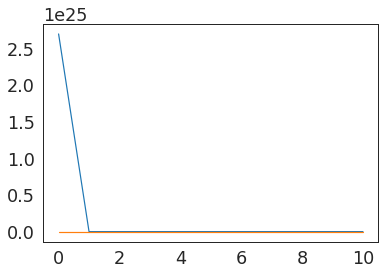

In [ ]:
psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial*(media_monto*(media_numero/prima)))
print(psi_analitica)
y = [psi_analitica, psi_analitica]
x = [0,10]

plt.plot(prob_ruina_panjer)
plt.plot(x,y)

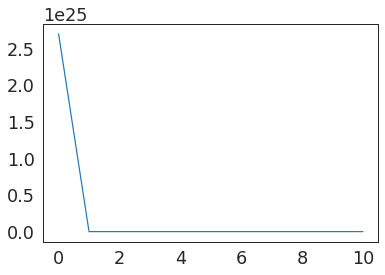

In [ ]:
plt.plot(prob_ruina_panjer)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

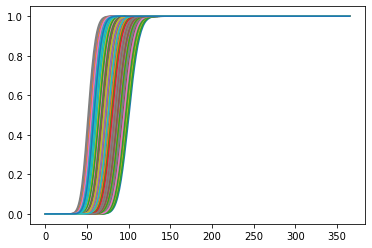

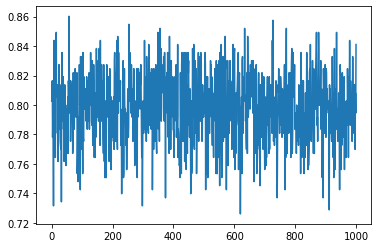

In [ ]:
#PROBALIDAD DE RUINA TOMANDO LA MAXIMA POR TRAYECTORIA
c_inicial = 0
prima  = media_monto*media_numero+1000000
prob_ruina_panjer=[] #lista que contendra las 10mil probabilidades

xt=c_inicial
for i in range(0,1001):
  print(i)
  #inicializamos p0
  lamda = np.random.poisson(media_numero)
  p0 = np.exp(-lamda)
  pi_acum=p0
  probs=[p0]
  for j in range(1,366):
    #inicializamos variables
    a=0
    b=lamda
    #calculamos la probabilidad en el dia i
    pi=(a+(b/j))*p0
    #generamos un nuevo p0 para las proximas probabilidad
    p0=pi
    pi_acum+=pi
    #lista de probabilidades del año
    probs.append(pi_acum)
    #probs.append(pi)
  #probabilidad media del año
  sum=0
  for m in probs:
    sum += m
  prob = sum/365
  #agregamos probabilidad general a las probabilidades de los años
  prob_ruina_panjer.append(prob)
  #visualizamos el comportamiento de la probabilidad de ruina cada año
  plt.plot(probs)
plt.show()

#psi_analitica = ((media_numero*media_monto)/prima)*math.exp(-c_inicial(media_monto*(media_numero/prima)))
y = [psi_analitica, psi_analitica]
x = [0,1000]

plt.plot(prob_ruina_panjer)
#plt.plot(x,y)

In [ ]:
sum=0
for m in probs:
  sum += m
prob = sum/365

In [ ]:
prob

0.8410958904109588